In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the dataset to explore
df = pd.read_csv('clean_dataset.csv')

In [12]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [13]:
# Display the first few rows of the dataset for a quick overview
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


The dataset comprises 690 entries with 16 columns, indicating a multidimensional feature space that includes both numerical and categorical variables. Here is a breakdown of its structure:

-Numerical Features: Age, Debt, YearsEmployed, CreditScore, ZipCode, Income
-Categorical Features: Gender, Married, BankCustomer, Industry, Ethnicity, PriorDefault, Employed, DriversLicense, Citizen, Approved (target variable)

The target variable, Approved, is binary, indicating that this dataset supports a classification task.

In [14]:
# Check for imbalanced class distribution
class_distribution = df['Approved'].value_counts(normalize=True)
class_distribution


Approved
0    0.555072
1    0.444928
Name: proportion, dtype: float64

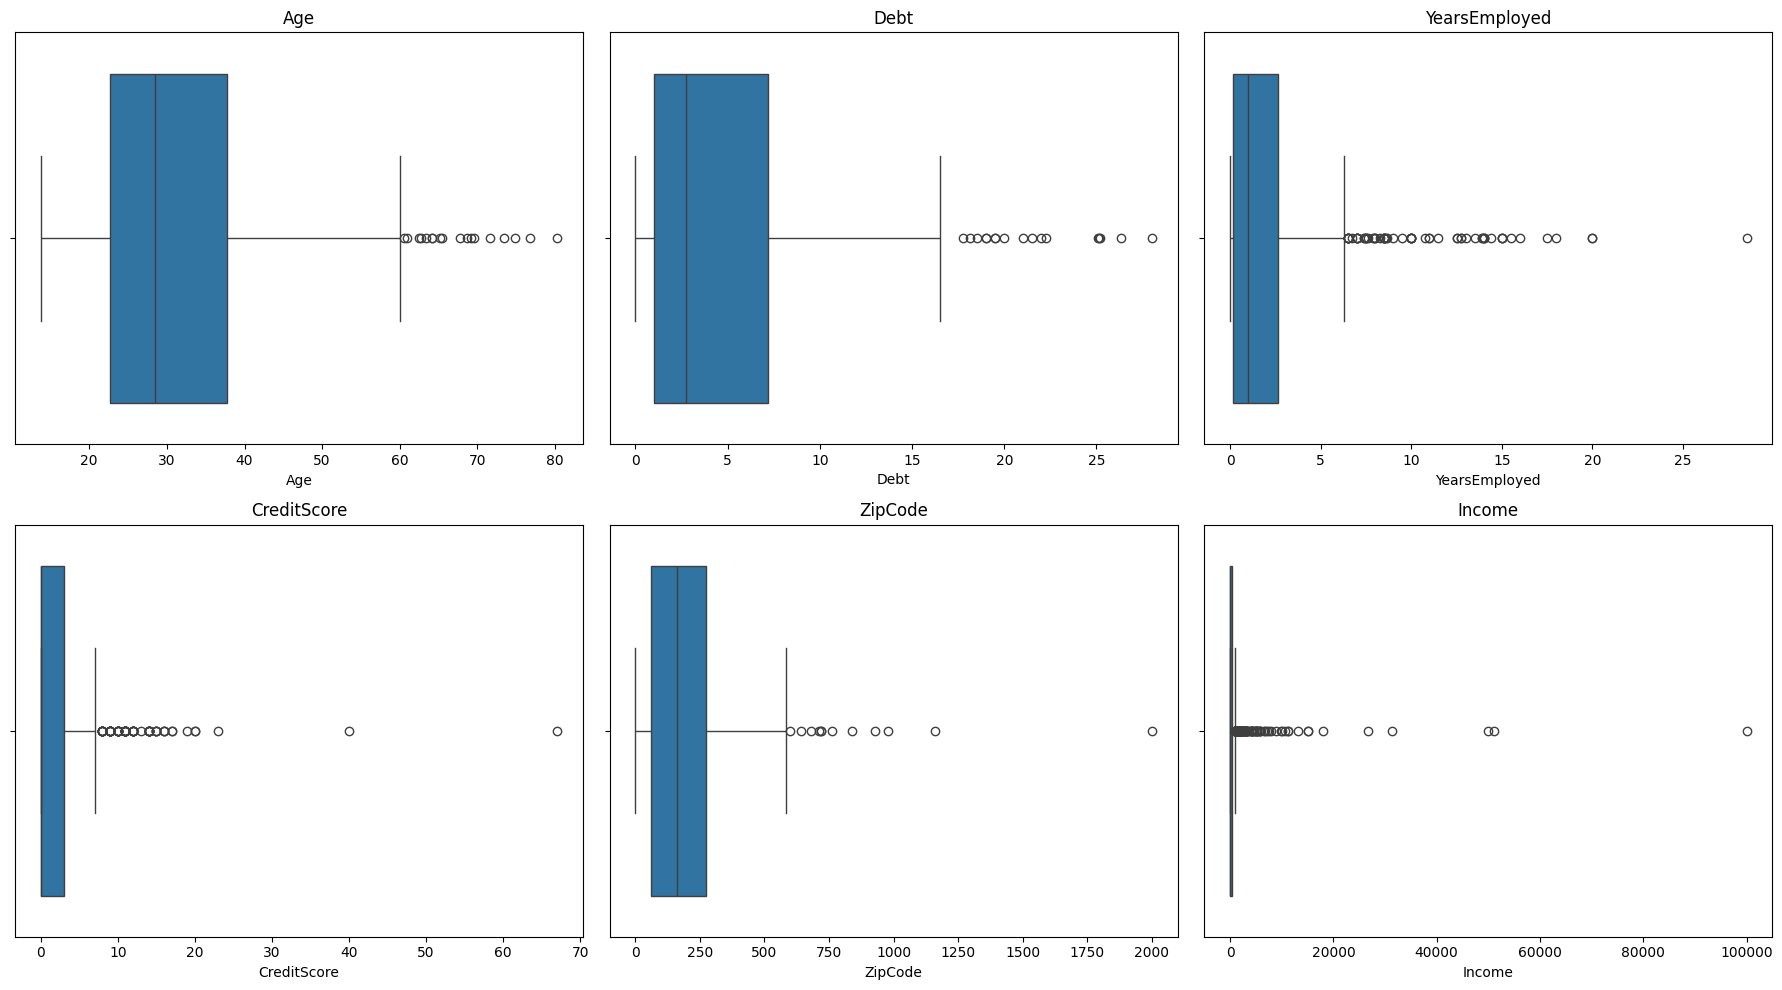

In [15]:
# Identify outliers using boxplots for numerical columns
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
numerical_columns = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(col)

plt.tight_layout()

The exploration reveals the following insights:

Imbalanced Class Distribution: The target variable Approved shows a relatively balanced distribution with 55.5% of the entries not approved (0) and 44.5% approved (1). While there is a slight imbalance, it may not be significant enough to severely impact model training without adjustments.

Presence of Outliers: The box plots for numerical columns indicate the presence of outliers in several features:

-Age, Debt, YearsEmployed, CreditScore, and Income have outliers, suggesting that some entries have unusually high values compared to the rest of the data.
-ZipCode also shows a wide distribution, but as a categorical feature represented numerically, its "outliers" might actually represent less common categories.

Given the high-dimensionality feature space and the presence of both numerical and categorical variables, the dataset appears to be a good candidate for Support Vector Machine (SVM) analysis.